In [1]:
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (18.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and dir

In [ ]:
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/프로젝트 폴더/data/selected_data

/content/drive/.shortcut-targets-by-id/1fmVXXO9WkxfQqimV76GhZhDAdNd3hhtJ/프로젝트 폴더/data/selected_data


In [ ]:
%ls

 data_out.csv                    상권생활인구.csv
 merged.csv                      상권영역.csv
 model_reg.pkl                   상권점포.csv
 model_r.pkl                     상권직장인구.csv
 result.csv                      상권집객시설.csv
 강남구예상매출.csv              상권추정매출.csv
'매출예측 데이터 전처리.ipynb'   예상매출.csv
'매출예측 모델 평가.ipynb'      '종합점수용 데이터 조인.ipynb'
 상권상주인구.csv                행정동코드.csv


In [ ]:
import pandas as pd
import numpy as np
data = pd.read_csv('data_out.csv')            # 로그변환 -> 이상치 데이터 모두 제거
data.drop(columns = ['Unnamed: 0'], inplace=True)
# 분기당 매출을 월매출로 생각하자!(1분기 : 3개월, 유사업종수로 나눔 까지 고려)

In [ ]:
data['분기당매출금액'] = data['분기당매출금액']/10000

In [ ]:
# 자치구코드, 업종코드 원핫 인코딩
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

train_cat = ohe.fit_transform(data[['시군구명','서비스업종코드명']])

data = pd.concat([data.drop(columns=['시군구명','서비스업종코드명']),
           pd.DataFrame(train_cat, columns=[col for col in np.append(ohe.categories_[0],ohe.categories_[1])])], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
from lightgbm import LGBMClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import lightgbm as lgb

In [ ]:
data = data.astype({'분기당매출금액': 'int'})
train = data[data.columns.difference(['분기당매출금액'])]
target = data[['분기당매출금액']]

x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.3, shuffle=True, random_state=2023)

In [ ]:
import joblib
load_model = joblib.load('model_reg.pkl')

In [ ]:
print(load_model.feature_importance())

[ 191  168   46  159  835 1406  154  142  107 1201   78 1810   87  112
  136  181  174  907 3159  802  132  159  112  144  203  767 3782 1877
 2532 2640 2690 2320 2631  481   87 1623 5355 4451 3764 2969 3027 3908
  162  140  852 5561  639  164  627  534 2034 4616  700  113  101  134
  674  501 4946  596 5440 6308  614  651 1530  618  901  797  813  725]


In [ ]:
print(load_model.feature_name())

['강남구', '강동구', '강북구', '강서구', '개업점포수', '관공서수', '관악구', '광진구', '구로구', '금요일_생활인구_수', '금천구', '남성_생활인구_수', '노원구', '도봉구', '동대문구', '동작구', '마포구', '목요일_생활인구_수', '버스정거장수', '분식전문점', '서대문구', '서초구', '성동구', '성북구', '송파구', '수요일_생활인구_수', '시간대_1_생활인구_수', '시간대_2_생활인구_수', '시간대_3_생활인구_수', '시간대_4_생활인구_수', '시간대_5_생활인구_수', '시간대_6_생활인구_수', '약국수', '양식음식점', '양천구', '여성_생활인구_수', '연령대_10_생활인구_수', '연령대_20_생활인구_수', '연령대_30_생활인구_수', '연령대_40_생활인구_수', '연령대_50_생활인구_수', '연령대_60_이상_생활인구_수', '영등포구', '용산구', '월요일_생활인구_수', '유사업종점포수', '육류판매', '은평구', '은행수', '일식음식점', '일요일_생활인구_수', '점포수', '제과점', '종로구', '중구', '중랑구', '중식음식점', '지하철수', '집객시설수', '총_생활인구_수', '총상주인구수', '총직장인구수', '치킨전문점', '커피-음료', '토요일_생활인구_수', '패스트푸드점', '폐업점포수', '한식음식점', '호프-간이주점', '화요일_생활인구_수']


Text(0.5, 1.0, '특성 중요도')

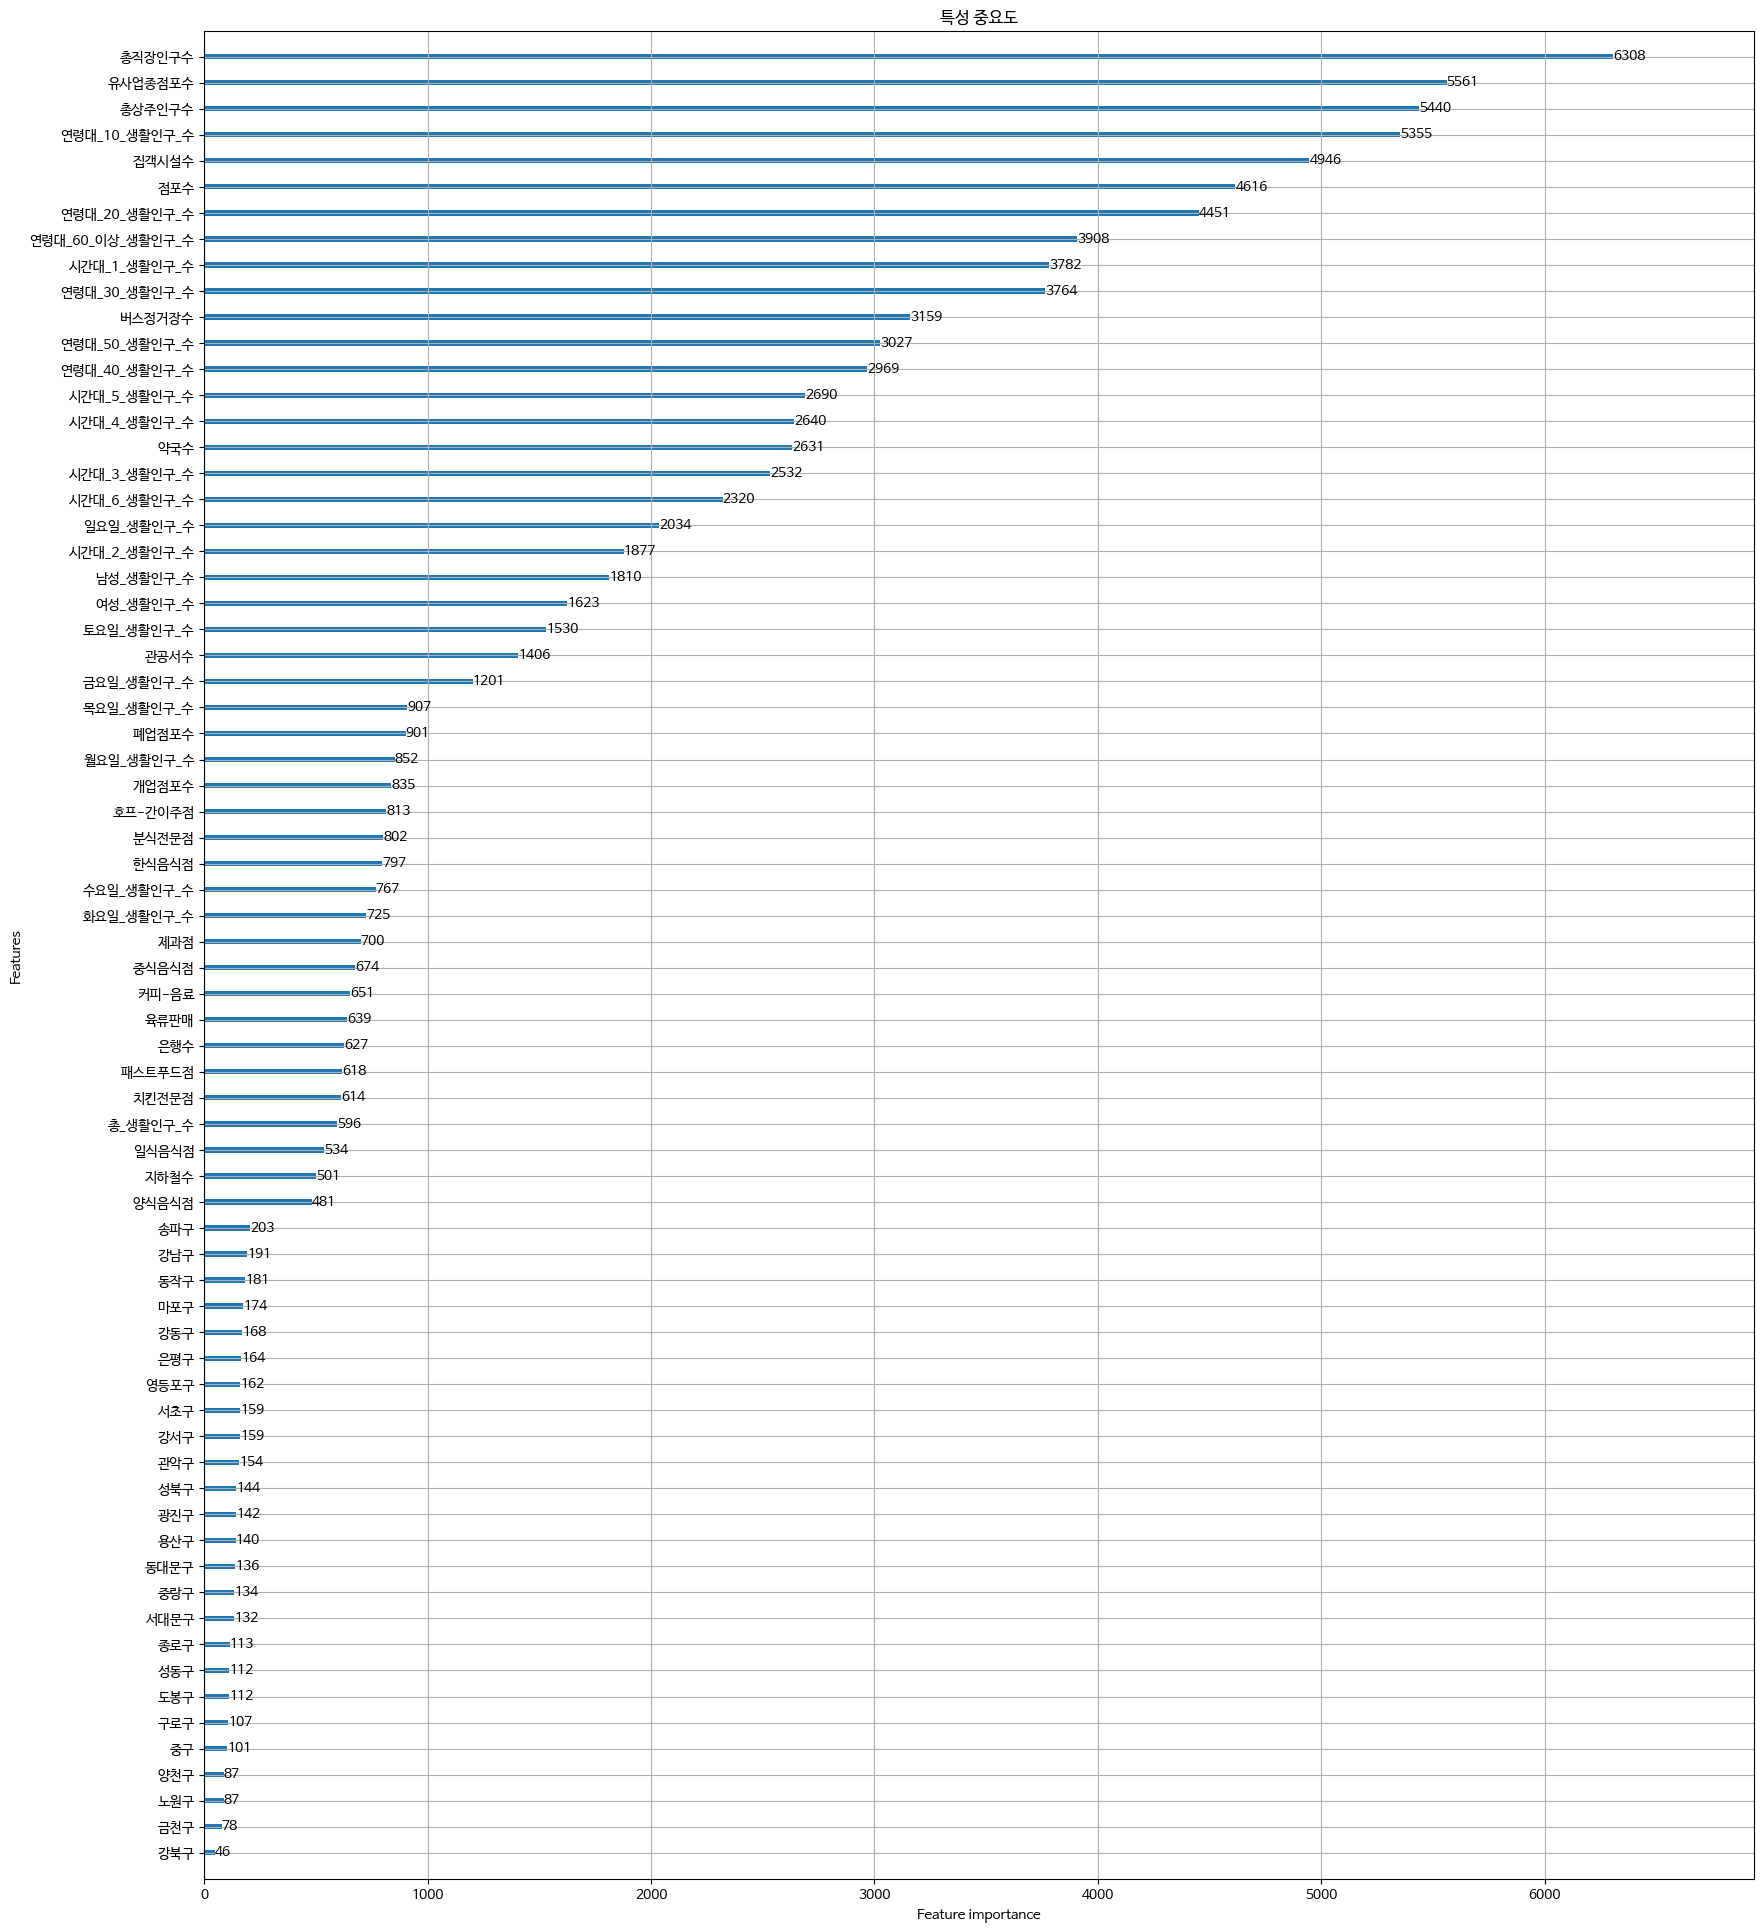

In [ ]:
fig, ax = plt.subplots(figsize = (20,24))
lgb.plot_importance(load_model,ax=ax)
plt.title('특성 중요도')